In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("muted")
import scipy.stats as stats
%matplotlib inline

In [29]:
elements = pd.read_csv('elements-by-episode.csv')
elements.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [3]:
columns = elements.columns
s = []
for c in columns:
    s.append([c, elements[c][elements[c]==1].size])

In [4]:
elem_df_extras = pd.DataFrame(s, columns=['element','count'])

In [5]:
elem_df = elem_df_extras[2:].sort_values('count', ascending=False)
elem_df.head()

,element,count
60,TREE,361
61,TREES,337
18,DECIDUOUS,227
16,CONIFER,212
15,CLOUDS,179


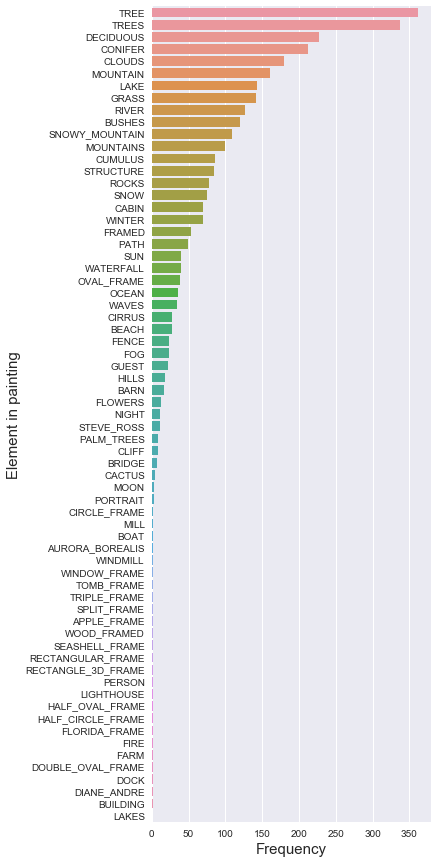

In [6]:
fig, ax = plt.subplots(1,1)
sns.barplot(y="element", x="count", data=elem_df, ax=ax)
fig.set_size_inches(5,15)
ax.set_xlabel('Frequency', fontsize=15)
ax.set_ylabel('Element in painting', fontsize=15)

There are clearly some very low frequency occurances here, including descriptors about frame shape, which are not relevent.

In [27]:
elem_df_todrop = elem_df[elem_df['count'] < 5]
dropcols = elem_df_todrop['element'].tolist()
dropcols

['CACTUS',
 'MOON',
 'PORTRAIT',
 'CIRCLE_FRAME',
 'MILL',
 'BOAT',
 'AURORA_BOREALIS',
 'WINDMILL',
 'WINDOW_FRAME',
 'TOMB_FRAME',
 'TRIPLE_FRAME',
 'SPLIT_FRAME',
 'APPLE_FRAME',
 'WOOD_FRAMED',
 'SEASHELL_FRAME',
 'RECTANGULAR_FRAME',
 'RECTANGLE_3D_FRAME',
 'PERSON',
 'LIGHTHOUSE',
 'HALF_OVAL_FRAME',
 'HALF_CIRCLE_FRAME',
 'FLORIDA_FRAME',
 'FIRE',
 'FARM',
 'DOUBLE_OVAL_FRAME',
 'DOCK',
 'DIANE_ANDRE',
 'BUILDING',
 'LAKES']

I also want to make sure we drop ```oval_frame```,  ```steve_ross```, ```guest```, and ```framed``` as categories not relevant to this analysis.

In [28]:
dropcols.extend(['OVAL_FRAME','STEVE_ROSS','GUEST','FRAMED'])
dropcols

['CACTUS',
 'MOON',
 'PORTRAIT',
 'CIRCLE_FRAME',
 'MILL',
 'BOAT',
 'AURORA_BOREALIS',
 'WINDMILL',
 'WINDOW_FRAME',
 'TOMB_FRAME',
 'TRIPLE_FRAME',
 'SPLIT_FRAME',
 'APPLE_FRAME',
 'WOOD_FRAMED',
 'SEASHELL_FRAME',
 'RECTANGULAR_FRAME',
 'RECTANGLE_3D_FRAME',
 'PERSON',
 'LIGHTHOUSE',
 'HALF_OVAL_FRAME',
 'HALF_CIRCLE_FRAME',
 'FLORIDA_FRAME',
 'FIRE',
 'FARM',
 'DOUBLE_OVAL_FRAME',
 'DOCK',
 'DIANE_ANDRE',
 'BUILDING',
 'LAKES',
 'OVAL_FRAME',
 'STEVE_ROSS',
 'GUEST',
 'FRAMED']

In [30]:
elements_new = elements.drop(dropcols, axis=1)
elements_new.head()

,EPISODE,TITLE,BARN,BEACH,BRIDGE,BUSHES,CABIN,CIRRUS,CLIFF,CLOUDS,...,ROCKS,SNOW,SNOWY_MOUNTAIN,STRUCTURE,SUN,TREE,TREES,WATERFALL,WAVES,WINTER
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,1,0,0,1,...,0,1,1,0,0,1,1,0,0,1
2,S01E03,"""EBONY SUNSET""",0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,1
3,S01E04,"""WINTER MIST""",0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


Update the histogram

In [33]:
new_columns = elements_new.columns
n = []
for c in new_columns:
    n.append([c, elements_new[c][elements_new[c]==1].size])
elem_df_extras = pd.DataFrame(n, columns=['element','count'])
elem_df = elem_df_extras[2:].sort_values('count', ascending=False)

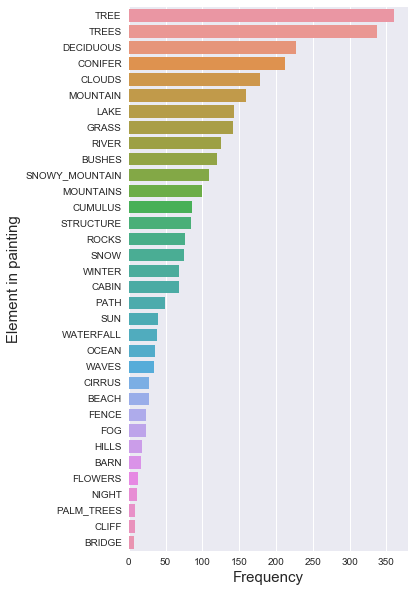

In [35]:
fig, ax = plt.subplots(1,1)
sns.barplot(y="element", x="count", data=elem_df, ax=ax)
fig.set_size_inches(5,10)
ax.set_xlabel('Frequency', fontsize=15)
ax.set_ylabel('Element in painting', fontsize=15)

Export new 